In [1]:
import csv
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
embedding_dim = 100
max_length = 16
trunc_type = 'post'
pad_type = 'post'
oov_tok = '<OOV>'
training_size = 160000
test_percentage =.1
file_path = 'C:/VIN_PYCHARM/ONE/Data/training_cleaned.csv'
corpus = []

In [10]:
# -- Following is the sample data of csv file --
#"0","2051179803","Fri Jun 05 20:59:11 PDT 2009","NO_QUERY","Thenight11","Angela hates my goatee and beer "
#"4","1998331163","Mon Jun 01 18:22:25 PDT 2009","NO_QUERY","RobCometX","@MarieLuv Glad to hear it! "


num_sentences = 0
with open(file_path, 'r', encoding='utf8') as csv_file:
    reader = csv.reader(csv_file, delimiter = ',')
    for row in reader:
        list_item = []
        list_item.append(row[5])
        row_label = row [0]
        if row_label == '0':
            list_item.append(0)
        else:
            list_item.append(1)
        num_sentences = num_sentences +1
        corpus.append(list_item)

In [11]:
print(num_sentences)
print(len(corpus))
print(corpus[1])

training_size = num_sentences

1600000
1600000
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]


In [15]:
import random

sentences   = []
label       = []

random.shuffle(corpus)

for index in range (training_size):
    sentences.append(corpus[index][0])
    label.append(corpus[index][1])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
vocab_size = len(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, maxlen=max_length,padding=pad_type, truncating=trunc_type)

split = int(test_percentage*training_size)

test_sequence   = padded_sequences[0:split]
test_labels      = label[0:split]

training_sequence   = padded_sequences[split:training_size]
training_labels      = label[split:training_size]


In [16]:
print(vocab_size)
print(word_index['i'])

138909
1


In [19]:
embeddings_index = {}

file_path_two = 'C:/VIN_PYCHARM/ONE/Data/glove.6B.100d.txt'

with open(file_path_two, 'r', encoding='utf8') as f:
    for line in f:
        values  = line.split()
        word    = values [0]
        coefficents = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefficents

embeddings_matrix = np.zeros((vocab_size +1 , embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

print(len(embeddings_matrix))

138910


In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 16, 100)           13891000  
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 100)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 12, 64)            32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 13,956,153
Trainable params: 65,153
Non-trainable params: 13,891,000
_____________________________________

In [23]:
num_epochs = 50

training_padded = np.array(training_sequence)
training_labels = np.array(training_labels)
testing_padded = np.array(test_sequence)
testing_labels = np.array(test_labels)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/50
4500/4500 - 23s - loss: 0.5644 - accuracy: 0.7025 - val_loss: 0.5415 - val_accuracy: 0.7180
Epoch 2/50
4500/4500 - 22s - loss: 0.5248 - accuracy: 0.7342 - val_loss: 0.5110 - val_accuracy: 0.7441
Epoch 3/50
4500/4500 - 20s - loss: 0.5080 - accuracy: 0.7469 - val_loss: 0.5085 - val_accuracy: 0.7504
Epoch 4/50
4500/4500 - 20s - loss: 0.4973 - accuracy: 0.7552 - val_loss: 0.5043 - val_accuracy: 0.7491
Epoch 5/50
4500/4500 - 20s - loss: 0.4887 - accuracy: 0.7598 - val_loss: 0.5079 - val_accuracy: 0.7496
Epoch 6/50
4500/4500 - 20s - loss: 0.4818 - accuracy: 0.7642 - val_loss: 0.5081 - val_accuracy: 0.7493
Epoch 7/50
4500/4500 - 20s - loss: 0.4767 - accuracy: 0.7674 - val_loss: 0.5016 - val_accuracy: 0.7533
Epoch 8/50
4500/4500 - 20s - loss: 0.4706 - accuracy: 0.7712 - val_loss: 0.5046 - val_accuracy: 0.7531
Epoch 9/50
4500/4500 - 20s - loss: 0.4661 - accuracy: 0.7734 - val_loss: 0.5048 - val_accuracy: 0.7524
Epoch 10/50
4500/4500 - 20s - loss: 0.4634 - accuracy: 0.7751 - val_loss:

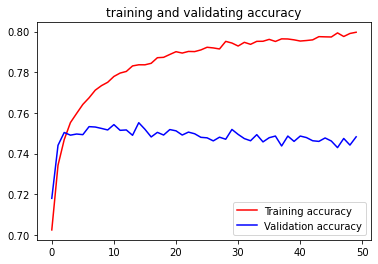

<Figure size 432x288 with 0 Axes>

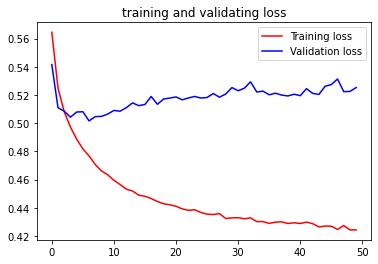

In [24]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('training and validating accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('training and validating loss')
plt.legend(loc=0)

In [25]:
layer = model.layers[0]
weights = layer.get_weights()[0]
print(weights.shape)



(138910, 100)


In [37]:
sentence = ["What a film"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=16, padding=pad_type, truncating=trunc_type)
classifications = model.predict(padded)
print(classifications[0])

[0.9340665]
